# DATA MINING PROJECT: IMAGE TO TEXT OCR

# Importing libraries

In [66]:
!pip install keras_ocr
import pandas as pd
import numpy as np
import cv2


from glob import glob
from tqdm.notebook import tqdm

import pytesseract
import easyocr
import keras_ocr

import matplotlib.pyplot as plt
import PIL
from PIL import Image

plt.style.use('ggplot')

# Preparing dataset

In [67]:
annot = pd.read_parquet(r'C:\Users\muzam\OneDrive\Desktop\ocr\annot.parquet')
imgs = pd.read_parquet(r'C:\Users\muzam\OneDrive\Desktop\ocr\img.parquet')
img_fns = glob(r"C:\Users\muzam\OneDrive\Desktop\ocr\train_val_images\train_images/*")

# Displaying dataset first image

In [68]:
image_id = img_fns[12].split('/')[-1].split('.')[0]
annot.query('image_id == @image_id')

,id,image_id,bbox,utf8_string,points,area


# Displaying dataset first 20 images

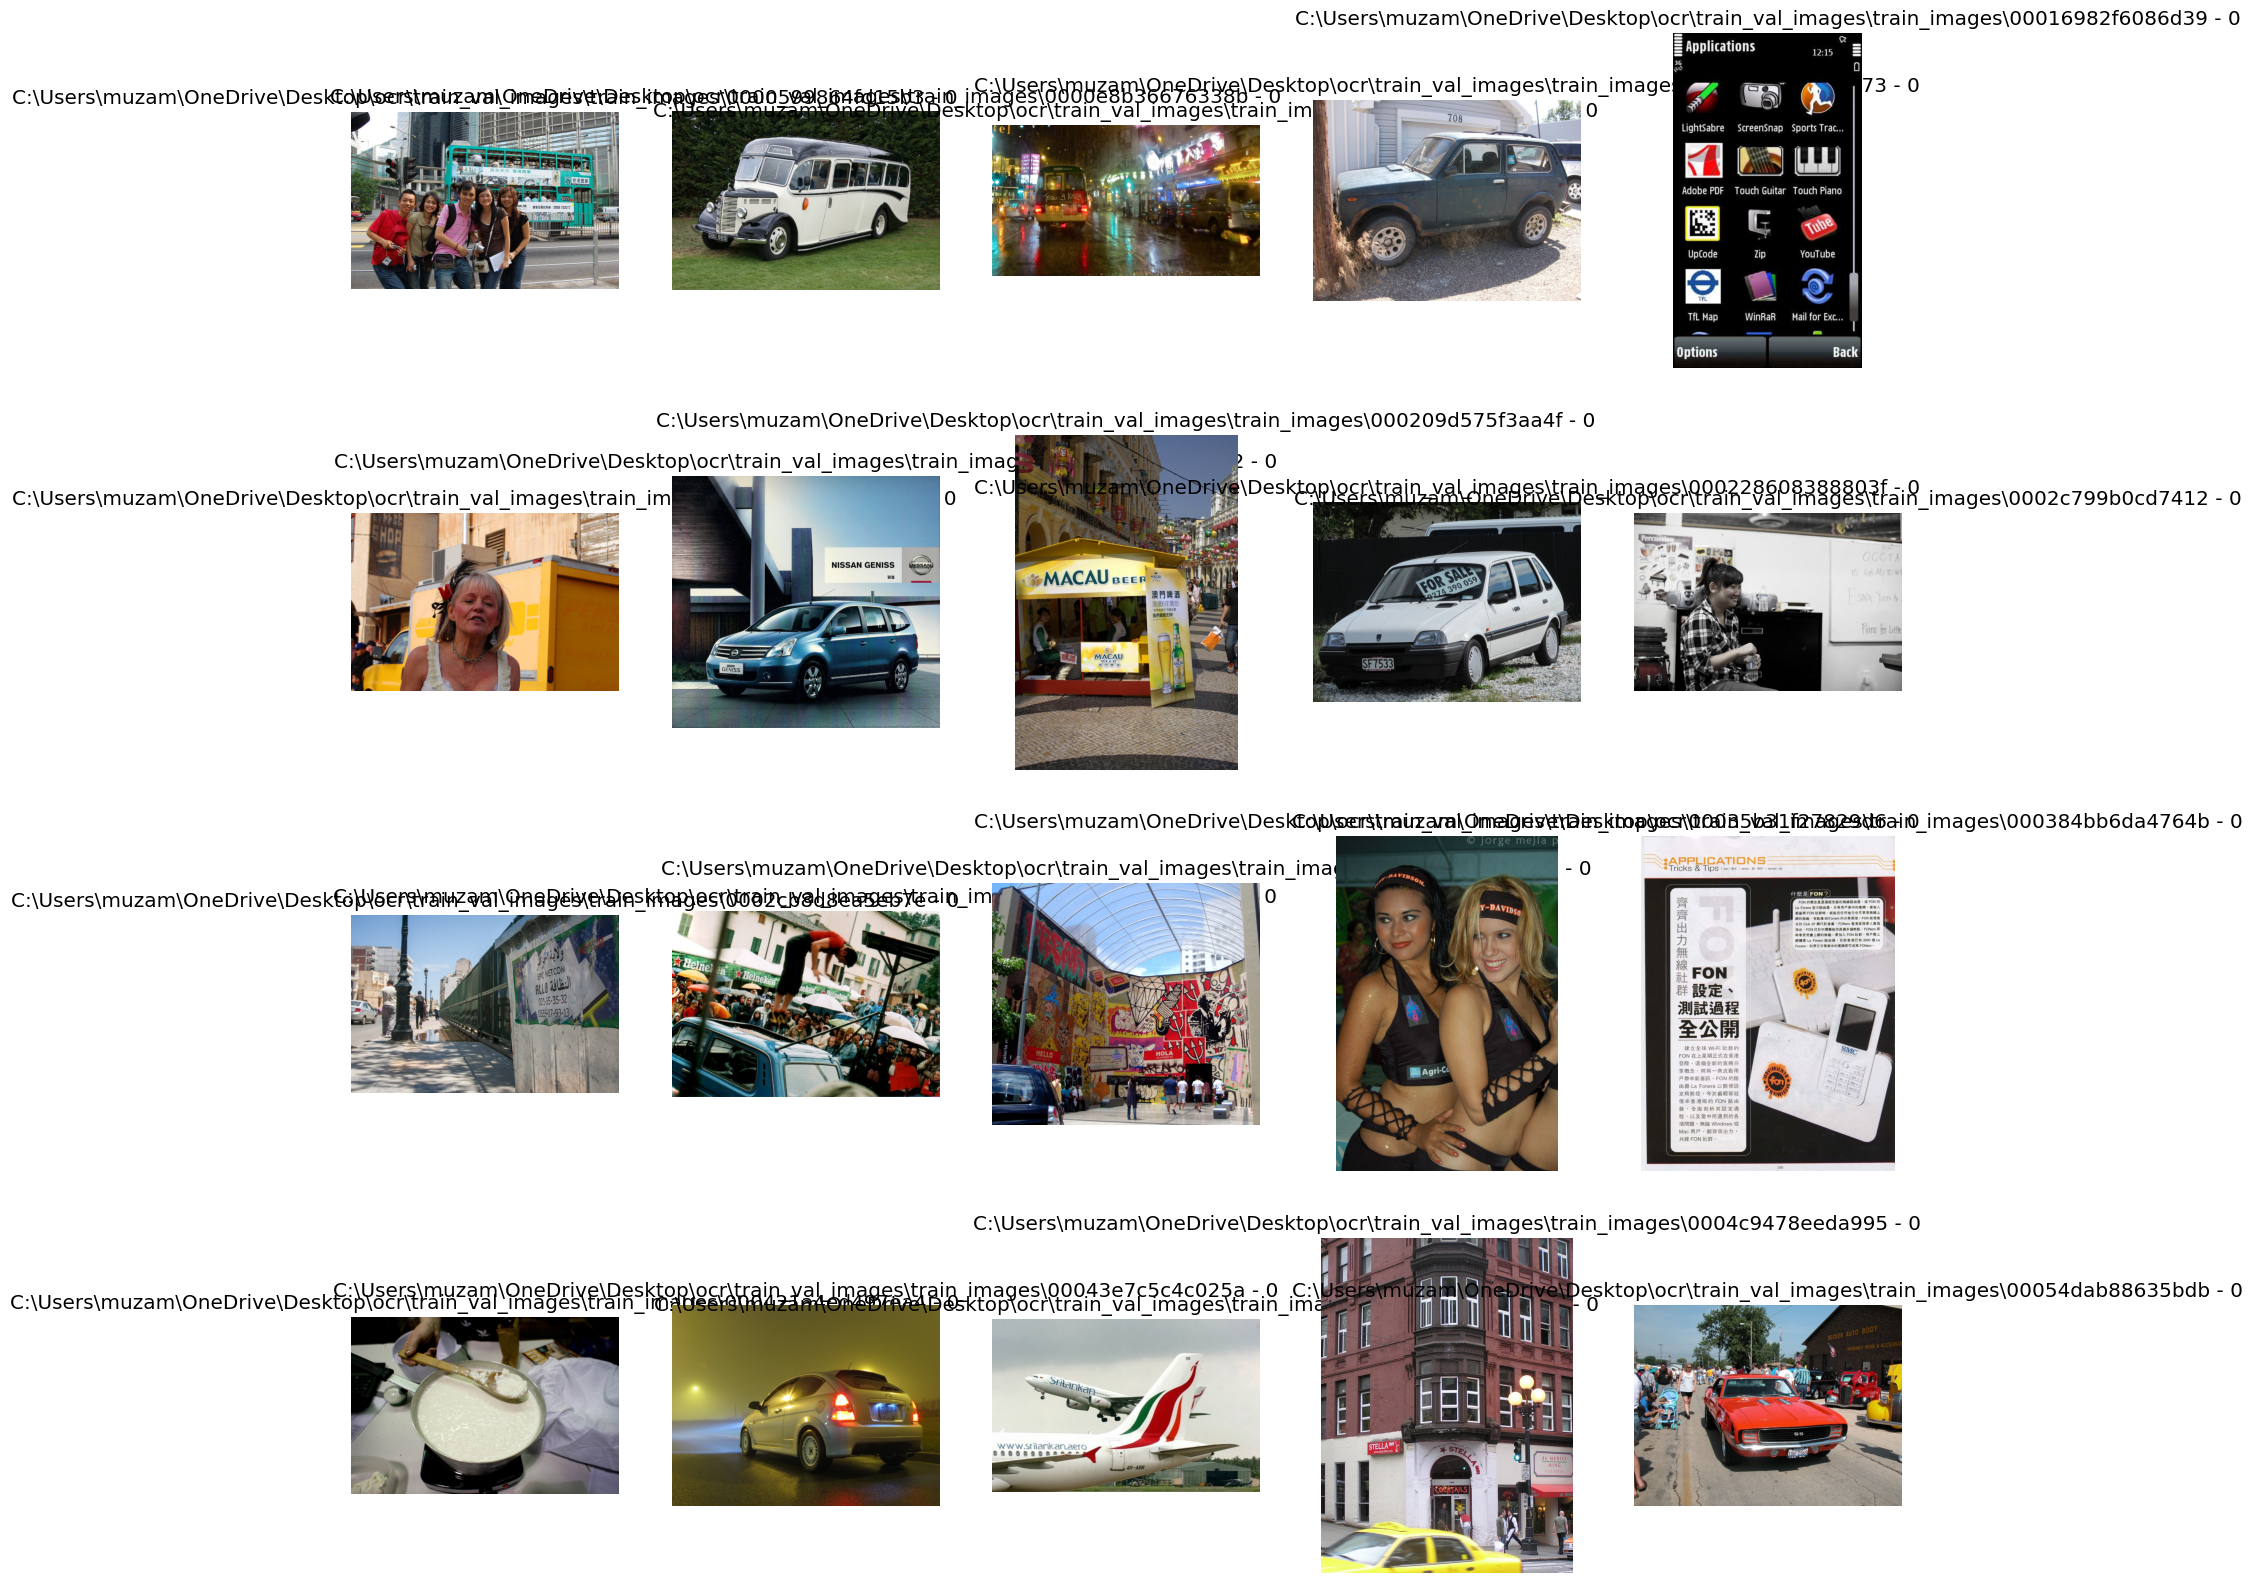

In [69]:
fig, axs = plt.subplots(4, 5, figsize=(20, 20))
axs = axs.flatten()
for i in range(20):
    axs[i].imshow(plt.imread(img_fns[i]))
    axs[i].axis('off')
    image_id = img_fns[i].split('/')[-1].rstrip('.jpg')
    n_annot = len(annot.query('image_id == @image_id'))
    axs[i].set_title(f'{image_id} - {n_annot}')
plt.show()

# Choose Image

In [82]:
sampleimage = r'C:\Users\muzam\OneDrive\Desktop\ocr\Screenshot 2024-10-05 142822.png'

# Method 1: pytesseract

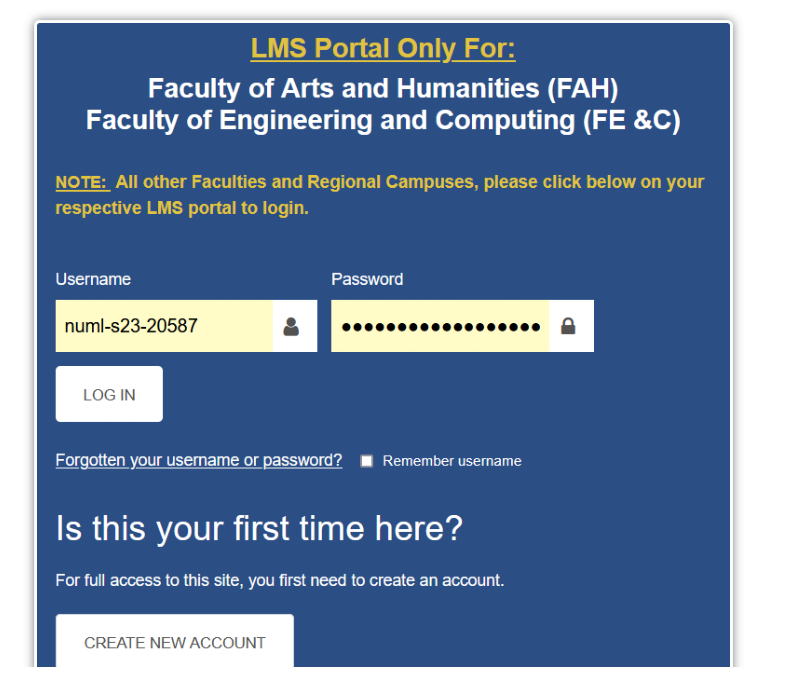

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [83]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(plt.imread(sampleimage))
ax.axis('off')
plt.show()

print("recognized text: "+pytesseract.image_to_string(sampleimage, lang='eng'))

# Method 2: easyocr

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


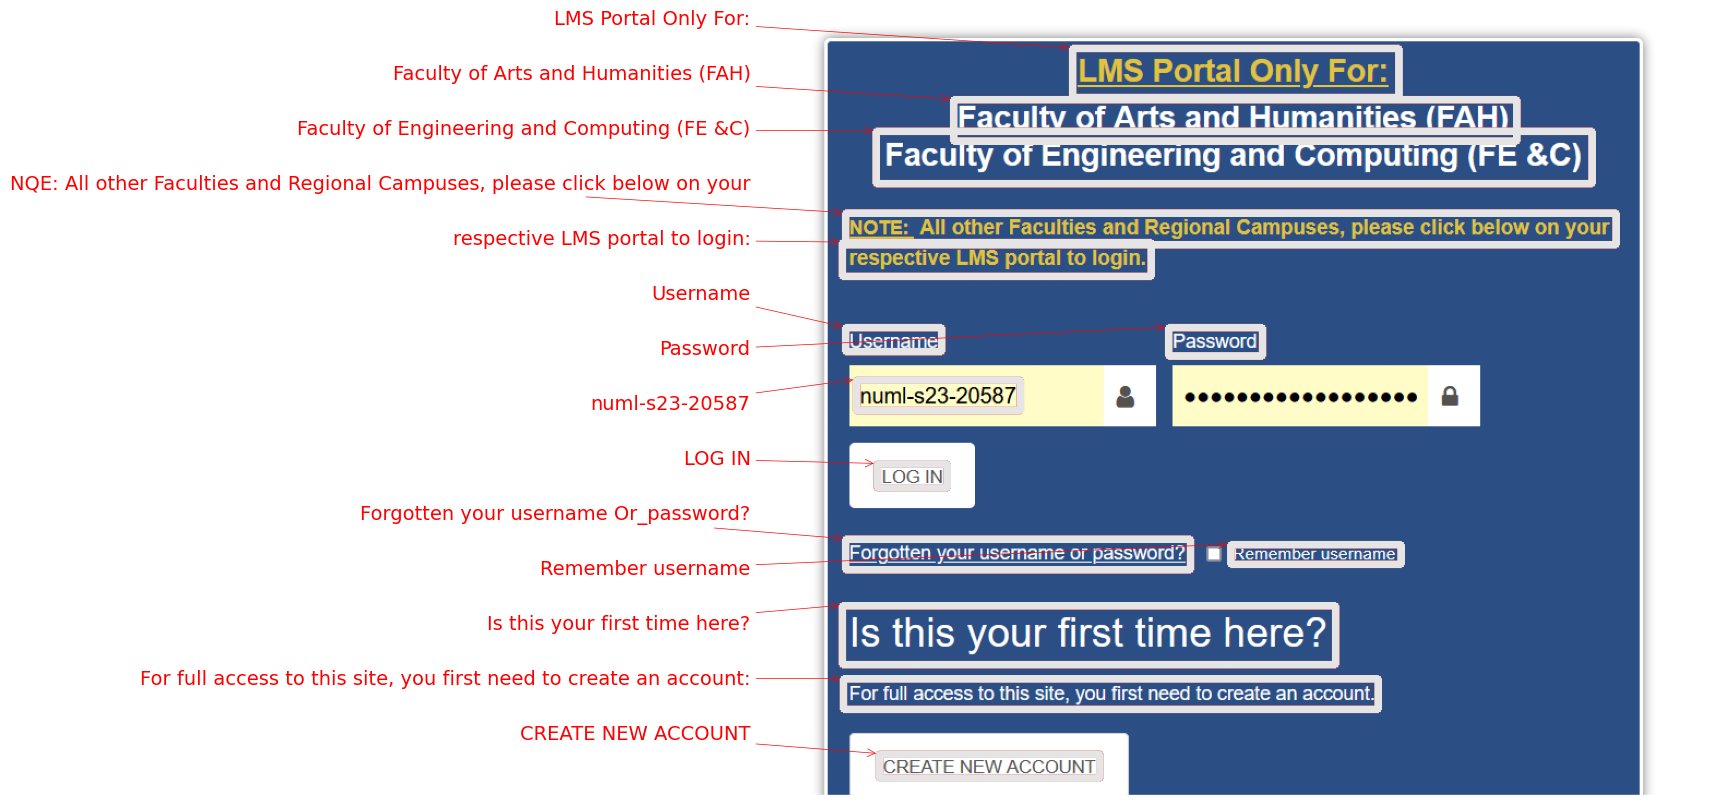

,bbox,text,conf
0,"[[253, 21], [552, 21], [552, 66], [253, 66]]",LMS Portal Only For:,0.912020
1,"[[144, 68], [660, 68], [660, 106], [144, 106]]",Faculty of Arts and Humanities (FAH),0.954640
2,"[[73, 97], [729, 97], [729, 145], [73, 145]]",Faculty of Engineering and Computing (FE &C),0.977047
3,"[[45, 172], [751, 172], [751, 201], [45, 201]]",NQE: All other Faculties and Regional Campuses...,0.761501
4,"[[42, 199], [325, 199], [325, 230], [42, 230]]",respective LMS portal to login:,0.498875
5,"[[45, 277], [133, 277], [133, 299], [45, 299]]",Username,0.999916
6,"[[341, 277], [427, 277], [427, 303], [341, 303]]",Password,0.668640
7,"[[55, 325], [205, 325], [205, 353], [55, 353]]",numl-s23-20587,0.890777
8,"[[74, 402], [138, 402], [138, 424], [74, 424]]",LOG IN,0.999209
9,"[[45, 471], [361, 471], [361, 499], [45, 499]]",Forgotten your username Or_password?,0.704980


In [84]:
reader = easyocr.Reader(['en'], gpu = True)
easyocr_bounds = reader.readtext(sampleimage,min_size=20,text_threshold = 0.8,contrast_ths=0.05,adjust_contrast=0.7,add_margin=0.15,width_ths= 0.7,decoder='beamsearch' )
easyocr_bounds

fig, axs = plt.subplots(1, 1, figsize=(15, 10))
    
easy_results = [(x[1], np.array(x[0])) for x in easyocr_bounds]
keras_ocr.tools.drawAnnotations(plt.imread(sampleimage), easy_results, ax=axs)

plt.show()

pd.DataFrame(easyocr_bounds, columns=['bbox','text','conf'])